# **Universidad ICESI**

*Milton Orlando Sarria*

----


## **Mínimos Cuadrados Ordinarios (OLS)**


### Problema,
Se tienen un conjunto de observaciones ${(x^{(1)},y^{(1)}),(x^{(2)},y^{(2)}),(x^{(3)},y^{(3)}),...,(x^{(m)},y^{(m)})}$. Llamaremos a la variable $x$ predictor o feature. Llamaremos a la variable y, respuesta o salida (target en inglés).
La idea es construir un modelo que aprenda a **predecir** o **estimar** la respuesta y en función de un predictor $x$. A esta predicción o estimación la llamaremos en general $\hat{y}$.
    
El algoritmo de **Mínimos Cuadrados Ordinarios (OLS)** se utiliza para estimar los parámetros de un modelo de regresión lineal, minimizando la suma de los errores cuadráticos entre los valores observados y los valores ajustados.


---
### **1. Modelo Lineal simple**

El modelo de **regresión lineal simple** se utiliza para modelar la relación entre una única variable independiente $x$ y una variable objetivo (o dependiente) $y$. El modelo asume una relación lineal entre estas variables y se representa de la siguiente manera:

$
h_\theta(x) = \theta_0 + \theta_1 x + \epsilon
$

Aquí:

- $h_\theta(x)$ es el valor predicho (o hipótesis).
- $\theta_0$ es el intercepto, es decir, el valor de $y$ cuando $x = 0$.
- $\theta_1$ es la pendiente, que determina cuánto cambia \(y\) por cada unidad de cambio en \(x\).
- $\epsilon$ es el error aleatorio con distribución normal


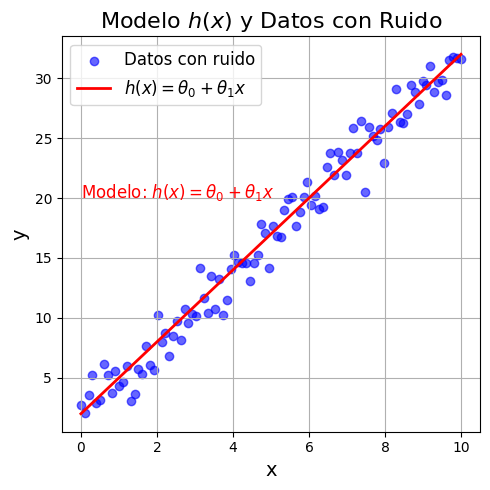

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros de la línea recta original
theta_0 = 2  # Intercepto
theta_1 = 3  # Pendiente

theta_true = [theta_0, theta_1]
# Generar datos
m = 100  # Número de observaciones

np.random.seed(42)  # Semilla para reproducibilidad
x = np.linspace(0, 10, m)  # m puntos equidistantes entre 0 y 10
y_true = theta_0 + theta_1 * x  # Línea recta original
ruido = 0.5*np.random.normal(0, 3, size=x.shape)  # Ruido gaussiano
y = y_true + ruido  # Datos con ruido

# Crear la gráfica
plt.figure(figsize=(5, 5))

# Graficar los datos con ruido
plt.scatter(x, y, color='blue', label='Datos con ruido', alpha=0.6)

# Graficar la línea recta original (modelo)
plt.plot(x, y_true, color='red', label=r'$h(x) = \theta_0 + \theta_1 x$', linewidth=2)

# Añadir texto en la gráfica
plt.text(0, 20, r'Modelo: $h(x) = \theta_0 + \theta_1 x$', fontsize=12, color='red')

# Configuración de la gráfica
plt.title('Modelo $h(x)$ y Datos con Ruido', fontsize=16)
plt.xlabel('x', fontsize=14)
plt.ylabel('y', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.tight_layout()

# Mostrar la gráfica
plt.show()

### 2. Representación Matricial

Para trabajar con múltiples observaciones ($m$ ejemplos en total), extendemos la notación para representar todos los datos de entrada como una matriz de diseño $\mathbf{X}$, donde cada fila es un vector extendido $[1, x^{(i)}]$:

$
\mathbf{X} = \begin{bmatrix}
1 & x^{(1)} \\
1 & x^{(2)} \\
\vdots & \vdots \\
1 & x^{(m)}
\end{bmatrix}
$

Las predicciones para todas las observaciones se representan como:

$
\mathbf{h}_\theta = \mathbf{X} \mathbf{\theta}
$
- $\mathbf{X}$ es la matriz de diseño $(m \times d$), donde $d$ incluye los términos de intercepto y variables independientes).
- $\mathbf{\theta}$ es el vector de parámetros $(d \times 1$).
- $\mathbf{y}$ es el vector de valores reales $(m \times 1$).

El vector de errores es:

$
\mathbf{e} = \mathbf{X} \mathbf{\theta} - \mathbf{y}
$

La suma de los errores cuadráticos se representa como el producto escalar del vector de errores consigo mismo:

$
\mathbf{e}^T \mathbf{e} = (\mathbf{X} \mathbf{\theta} - \mathbf{y})^T (\mathbf{X} \mathbf{\theta} - \mathbf{y})
$

La función de costo $J(\theta)$ en forma matricial es:

$
J(\theta) = \frac{1}{m} (\mathbf{X} \mathbf{\theta} - \mathbf{y})^T (\mathbf{X} \mathbf{\theta} - \mathbf{y})
$

---


### **3. Problema de Minimización**
El objetivo del OLS es encontrar los valores de $\boldsymbol{\theta}$ que minimicen la suma de los errores cuadráticos:

$
\mathcal{L}(\boldsymbol{\theta}) = (\mathbf{y} - \mathbf{X} \boldsymbol{\theta})^\top (\mathbf{y} - \mathbf{X} \boldsymbol{\theta})
$

---

### **Derivación de la Solución**
Expandimos la función de pérdida:

$
\mathcal{L}(\boldsymbol{\theta}) = \mathbf{y}^\top \mathbf{y} - 2 \mathbf{y}^\top \mathbf{X} \boldsymbol{\theta} + \boldsymbol{\theta}^\top \mathbf{X}^\top \mathbf{X} \boldsymbol{\theta}
$

Derivamos respecto a $\boldsymbol{\theta}$ y la igualamos a cero:

$
\frac{\partial \mathcal{L}(\boldsymbol{\theta})}{\partial \boldsymbol{\theta}} = -2 \mathbf{X}^\top \mathbf{y} + 2 \mathbf{X}^\top \mathbf{X} \boldsymbol{\theta} = 0
$

Resolviendo:

$
\mathbf{X}^\top \mathbf{X} \boldsymbol{\theta} = \mathbf{X}^\top \mathbf{y}
$

$
\boldsymbol{\theta} = (\mathbf{X}^\top \mathbf{X})^{-1} \mathbf{X}^\top \mathbf{y}
$


---

## **Implementación en Python**

La implementación del procedimiento en Python usando NumPy es la siguiente:


In [3]:
import numpy as np

# Crear matriz X con un término de intercepto
X = np.vstack([np.ones((m)), x]).T  # Agregar columna de 1s para el intercepto

# Crear vector de respuestas y
true_theta = np.array([theta_0,theta_1])  # Coeficientes verdaderos

# Implementar OLS
XtX = X.T @ X
XtX_inv = np.linalg.inv(XtX)
XtY = X.T @ y
theta_hat = XtX_inv @ XtY

print("Coeficientes estimados (theta):", theta_hat)

Coeficientes estimados (theta): [1.74078072 3.0206899 ]


---

## Interpretación de los Resultados
El vector $\boldsymbol{\theta}$ estimado (almacenado en `theta_hat`) contiene los coeficientes ajustados:
- El primer coeficiente corresponde al intercepto.
- Los demás coeficientes corresponden a las variables independientes.

---

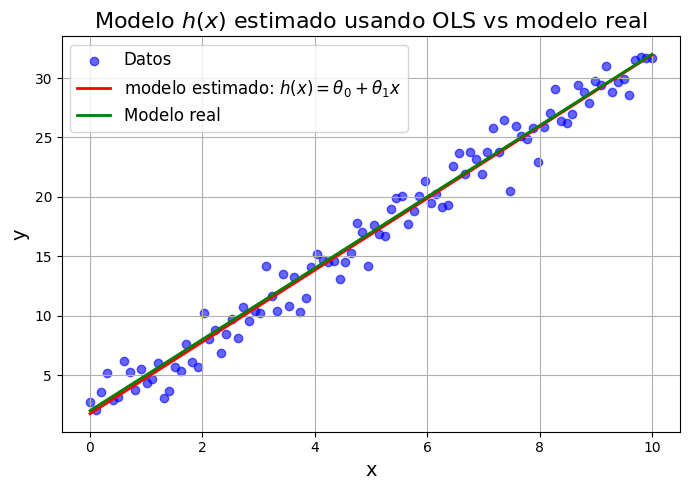

In [4]:
# Crear la gráfica
plt.figure(figsize=(7, 5))

# Graficar los datos con ruido
plt.scatter(X[:,1], y, color='blue', label='Datos', alpha=0.6)

# Graficar la línea recta del modelo estimado
plt.plot(X[:,1], X@theta_hat, color='red', label=r'modelo estimado: $h(x) = \theta_0 + \theta_1 x$', linewidth=2)

# Graficar la línea recta del modelo estimado
plt.plot(X[:,1], X@true_theta, color='green', label=r'Modelo real', linewidth=2)
# Configuración de la gráfica
plt.title('Modelo $h(x)$ estimado usando OLS vs modelo real', fontsize=16)
plt.xlabel('x', fontsize=14)
plt.ylabel('y', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.tight_layout()
# Mostrar la gráfica
plt.show()

## **4 Validación de Resultados**
Para verificar la calidad del ajuste, calculamos los valores ajustados ($\hat{\mathbf{y}} = \mathbf{X} \boldsymbol{\theta}$) y medimos el error cuadrático medio:

In [5]:
# Valores ajustados
y_hat = X @ theta_hat
# Error cuadrático medio (MSE)
mse = np.mean((y - y_hat) ** 2)
print("Error cuadrático medio (MSE):", mse)

Error cuadrático medio (MSE): 1.8335356053706762


In [6]:
import statsmodels.api as sm
# Ajustar el modelo usando statsmodels
model_sm = sm.OLS(y, X)  # Nota: X ya incluye el término de intercepto
results_sm = model_sm.fit()

In [7]:
print("Coeficientes estimados (theta) con statsmodels:")
print(results_sm.params)


#Esto debería dar resultados muy similares a los obtenidos manualmente:
# Coeficientes estimados
print("Coeficientes estimados (theta) con Numpy (de forma manual):")
print(theta_hat)


Coeficientes estimados (theta) con statsmodels:
[1.74078072 3.0206899 ]
Coeficientes estimados (theta) con Numpy (de forma manual):
[1.74078072 3.0206899 ]


# **Optimizar la función de costo de OLS empleando gradiente descendente**


# **Introducción al Gradiente Descendente**

El **gradiente descendente** es un algoritmo de optimización utilizado para minimizar funciones de costo en problemas de aprendizaje automático. Se usa para ajustar los parámetros de un modelo de manera iterativa hasta encontrar los valores óptimos.

### **1. Definición Matemática**
Dado un conjunto de datos con puntos $(x_i, y_i)$ y una función de costo $ J(\theta) $ que queremos minimizar, el algoritmo ajusta los parámetros $ \theta $ en la dirección del gradiente negativo:

$
\theta := \theta - \alpha \frac{\partial J(\theta)}{\partial \theta}
$

Donde:
- $ \theta $ son los parámetros del modelo.
- $ \alpha $ es la **tasa de aprendizaje**, que controla el tamaño del paso.
- $ \frac{\partial J(\theta)}{\partial \theta} $ es el **gradiente**, que indica la dirección de mayor incremento de la función de costo.

---
 😊

---

### **2. Derivación de ecuaciones para el modelo de Regresión Lineal simple**

Consideremos un conjunto de puntos y ajustemos una recta de la forma:

$
h_\theta(x) = \theta_0 + \theta_1 x
$

Queremos minimizar la **función de costo**:

$
J(\theta_0, \theta_1) = \frac{1}{2m} \sum_{i=1}^{m} (h_\theta(x^{(i)}) - y^{(i)})^2
$

donde $ m $ es el número de ejemplos.

El **gradiente** se calcula como:

$
\frac{\partial J}{\partial \theta_0} = \frac{1}{m} \sum_{i=1}^{m} (h_\theta(x^{(i)}) - y^{(i)})
$

$
\frac{\partial J}{\partial \theta_1} = \frac{1}{m} \sum_{i=1}^{m} (h_\theta(x^{(i)}) - y^{(i)}) x^{(i)}
$

La actualización de parámetros es:

$
\theta_0 := \theta_0 - \alpha \frac{\partial J}{\partial \theta_0}
$

$
\theta_1 := \theta_1 - \alpha \frac{\partial J}{\partial \theta_1}
$

---
 😊

### Paso 1: Preparar datos
En este caso usaremos los datos simulados que hemos empleado en los casos anteriores



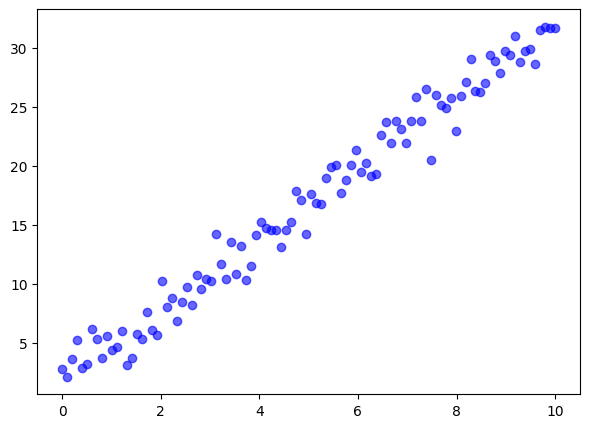

In [8]:
# Crear la gráfica
plt.figure(figsize=(7, 5))
# Graficar los datos con ruido
plt.scatter(x, y, color='blue', label='Datos', alpha=0.6)


### Paso 2: Inicializar los Parámetros

Inicializamos los parámetros $\theta_0$ y $\theta_1$ con valores iniciales.


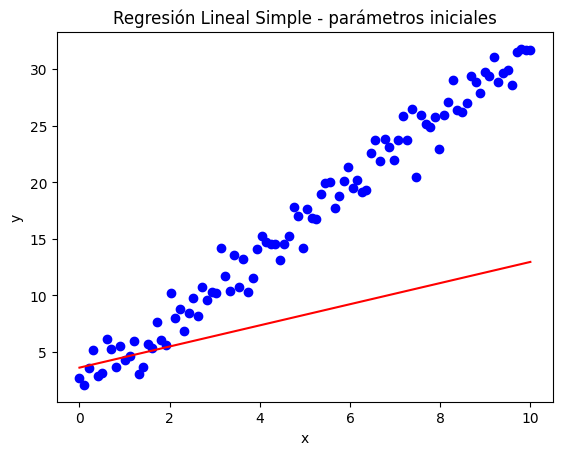

In [9]:
import random

random.seed(20)
# Inicializar parámetros de forma aleatoria
theta_0_h = random.random()*4
random.seed(110)
theta_1_h = random.random()

# Visualizar los datos y la línea de regresión con los parámetros iniciales
plt.scatter(x, y, color='blue')
plt.plot(x, theta_0_h + theta_1_h * x, color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Regresión Lineal Simple - parámetros iniciales')
plt.show()

### Paso 3: Implementar la Hipótesis y la Función de Costo

La hipótesis $h(x)$ se define como:

$ h(x) = \theta_0 + \theta_1 \cdot x $

La función de costo $J(\theta_0, \theta_1)$ se define como:

$ J(\theta_0, \theta_1) = \frac{1}{2m} \sum_{i=1}^{m} \left( h(x^{(i)}) - y^{(i)} \right)^2 $


In [10]:
m = len(y)

def hypothesis(X, t0, t1):
    return t0 + t1 * X

def cost_function(X, y, t0, t1):
    return (1 / (2 * m)) * np.sum((hypothesis(X, t0, t1) - y) ** 2)

### Paso 4: Implementar el Algoritmo de Gradiente Descendente

El gradiente descendente se actualiza según las siguientes fórmulas:

$
\theta_0 := \theta_0 - \alpha \cdot \frac{1}{m} \sum_{i=1}^{m} \left( h(x^{(i)}) - y^{(i)} \right)
$

$
\theta_1 := \theta_1 - \alpha \cdot \frac{1}{m} \sum_{i=1}^{m} \left( \left( h(x^{(i)}) - y^{(i)} \right) \cdot x^{(i)} \right)
$

In [11]:
# Listas para almacenar el historial de costos y parámetros
cost_history = []
theta_0_history = []
theta_1_history = []

# Definir la tasa de aprendizaje y el número de iteraciones
learning_rate = 0.01
n_iterations = 2000
# Algoritmo de gradiente descendente
for _ in range(n_iterations):
    # Calcular las predicciones
    h = hypothesis(x, theta_0_h, theta_1_h)
    
    # Calcular gradientes
    d_theta_0 = (1/m) * np.sum(h - y)
    d_theta_1 = (1/m) * np.sum((h - y) * x)
    
    # Actualizar los parámetros
    theta_0_h -= learning_rate * d_theta_0
    theta_1_h -= learning_rate * d_theta_1
    
    # Almacenar el costo y los parámetros en cada iteración
    cost = cost_function(x, y, theta_0_h, theta_1_h)
    cost_history.append(cost)
    theta_0_history.append(theta_0_h)
    theta_1_history.append(theta_1_h)


In [12]:
# Mostrar los parámetros finales
print(f"Parámetros finales: theta_0_hat = {theta_0_h}, theta_1_hat = {theta_1_h}")

# Mostrar los parámetros reales
print(f"Parámetros reales: theta_0 = {theta_0}, theta_1 = {theta_1}")

Parámetros finales: theta_0_hat = 1.75568507613307, theta_1_hat = 3.018448879122507
Parámetros reales: theta_0 = 2, theta_1 = 3


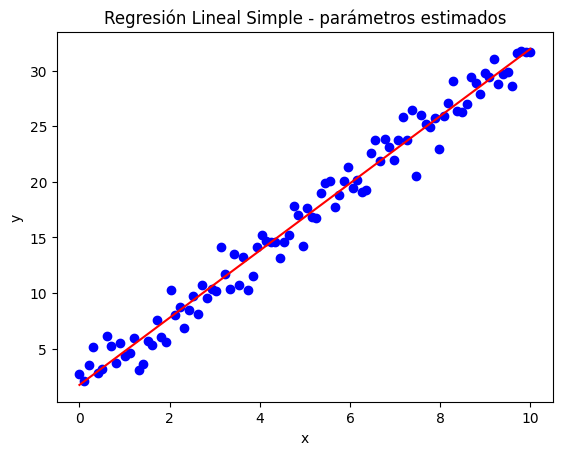

In [13]:
# Visualizar los datos y la línea de regresión con los parámetros estimados
plt.scatter(x, y, color='blue')
plt.plot(x, theta_0_h + theta_1_h * x, color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Regresión Lineal Simple - parámetros estimados')
plt.show()


### Paso 5: Visualizar la Evolución de la Función de Costo

Ahora, visualizamos cómo la función de costo disminuye con las iteraciones, lo cual indica que el modelo está convergiendo.

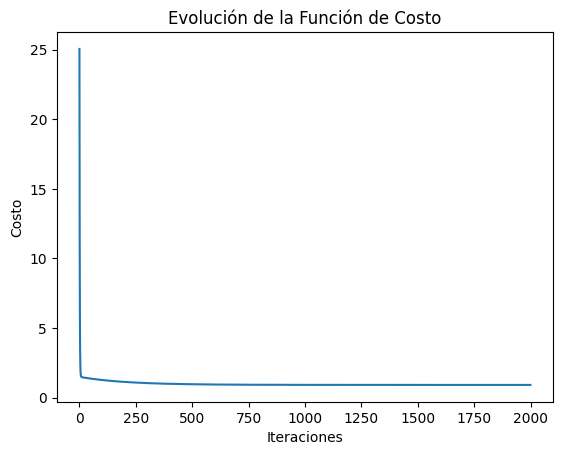

In [14]:
# Visualizar la evolución de la función de costo
plt.plot(cost_history)
plt.xlabel('Iteraciones')
plt.ylabel('Costo')
plt.title('Evolución de la Función de Costo')
plt.show()

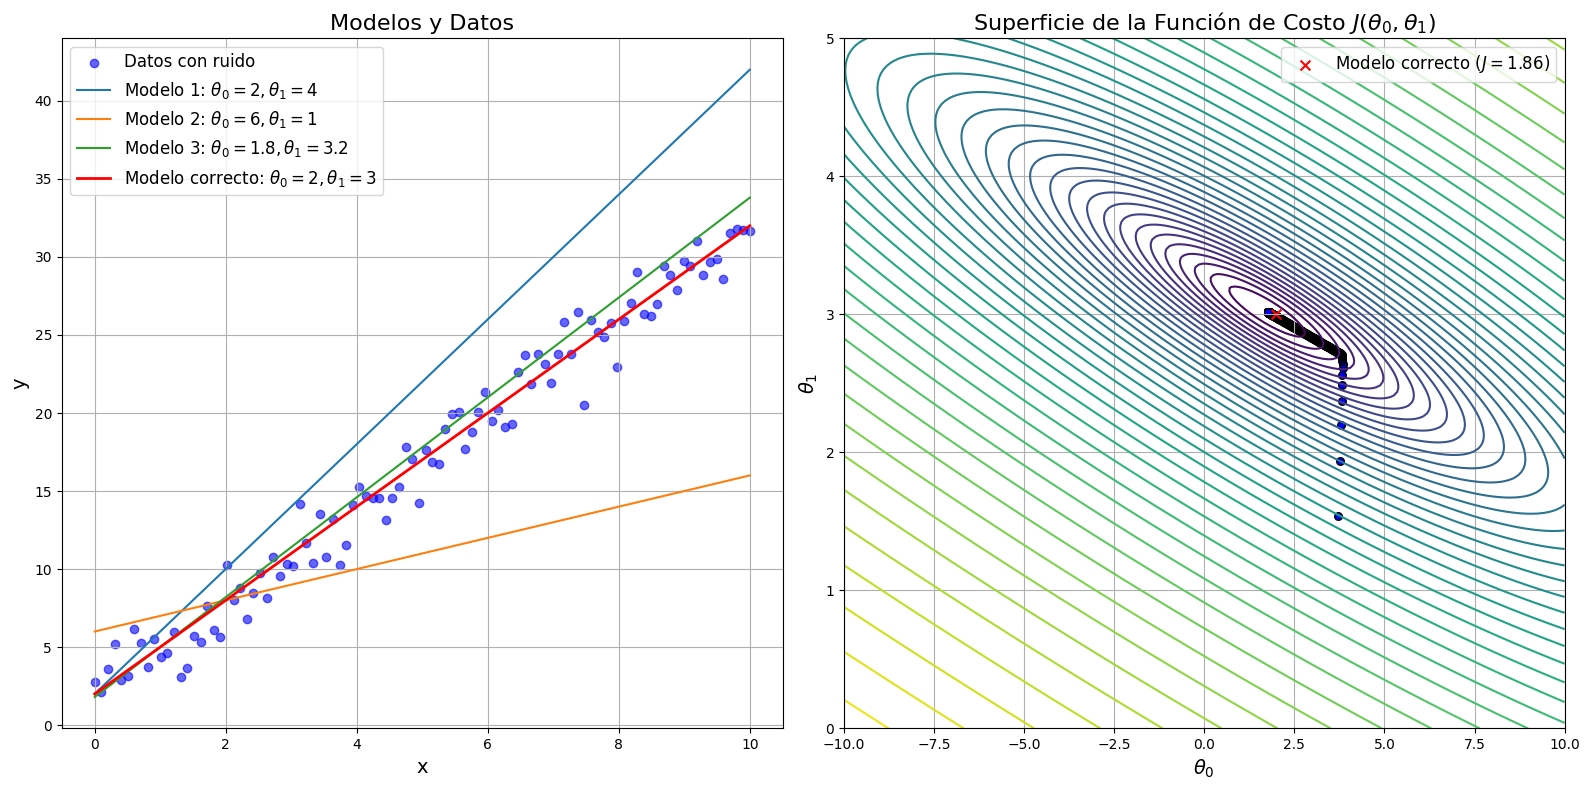

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Definición de la función de costo
def calcular_costo(x,y,t0, t1):
    y_pred = t0 + t1 * x
    return np.mean((y_pred - y) ** 2)

# Crear una cuadrícula de valores para theta_0 y theta_1
theta_0_vals = np.linspace(-10, 10, 200)
theta_1_vals = np.linspace(0, 5, 200)
T0, T1 = np.meshgrid(theta_0_vals, theta_1_vals)

# Calcular la superficie de la función de costo J(theta_0, theta_1)
J_vals = np.array([[calcular_costo(x,y,t0, t1) for t1 in theta_1_vals] for t0 in theta_0_vals])

# Valores de modelos alternativos
models = [
    (2, 4),  # Modelo 1
    (6, 1),  # Modelo 2
    (1.8, 3.2),  # Modelo 3
]

# Cálculo del costo para cada modelo alternativo
J_models = [calcular_costo(x,y,t0, t1) for t0, t1 in models]
# Crear la figura
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# --- Gráfico de la izquierda: Modelos con datos
axes[0].scatter(x, y, color='blue', label='Datos con ruido', alpha=0.6)
# Graficar los modelos alternativos
for i, (t0, t1) in enumerate(models):
    y_model = t0 + t1 * x
    axes[0].plot(x, y_model, label=f'Modelo {i+1}: $\\theta_0={t0}, \\theta_1={t1}$')
# Graficar el modelo correcto
axes[0].plot(x, y_true, color='red', linewidth=2, label=f'Modelo correcto: $\\theta_0={theta_0}, \\theta_1={theta_1}$')

# Configuración del gráfico izquierdo
axes[0].set_title('Modelos y Datos', fontsize=16)
axes[0].set_xlabel('x', fontsize=14)
axes[0].set_ylabel('y', fontsize=14)
axes[0].legend(fontsize=12)
axes[0].grid(True)

# --- Gráfico de la derecha: Superficie de J
contour = axes[1].contour(T0, T1, np.log(J_vals.T), levels=50, cmap='viridis')
#contour = axes[1].contourf(T0, T1, J_vals.T, levels=50, cmap='viridis')
# Graficar los puntos para los modelos alternativos

axes[1].scatter(theta_0_history, theta_1_history, color="blue", edgecolor='black', s=30)

  
# Graficar el modelo correcto
J = calcular_costo(x,y,theta_0, theta_1)
axes[1].scatter(theta_true[0], theta_true[1], color='red', marker='x', s=50, label=f'Modelo correcto ($J={J:.2f}$)')

# Configuración del gráfico derecho
axes[1].set_title('Superficie de la Función de Costo $J(\\theta_0, \\theta_1)$', fontsize=16)
axes[1].set_xlabel('$\\theta_0$', fontsize=14)
axes[1].set_ylabel('$\\theta_1$', fontsize=14)
axes[1].legend(fontsize=12)
axes[1].grid(True)

# Ajuste final y mostrar
plt.tight_layout()
plt.show()


---
## **Extensión al Modelo de Regresión Lineal Múltiple**

En el modelo de regresión lineal múltiple, la relación se extiende a múltiples variables independientes:

$ h(\mathbf{x}) = \theta_0 + \theta_1 \cdot x_1 + \theta_2 \cdot x_2 + \ldots + \theta_n \cdot x_n $

donde:
- $ h(\mathbf{x}) $: valor estimado de la variable dependiente.
- $ \theta_0 $: intercepto.
- $ \theta_1, \theta_2, \ldots, \theta_n $: coeficientes de las variables independientes $ x_1, x_2, \ldots, x_n $.

Los supuestos mencionados anteriormente se mantienen en el modelo múltiple, con la consideración adicional de que no debe existir multicolinealidad perfecta entre las variables independientes, es decir, las variables explicativas no deben estar perfectamente correlacionadas entre sí.


#### **Multicolinealidad en Regresión Lineal Múltiple**

Generamos datos donde dos variables independientes están altamente correlacionadas:

In [224]:
import pandas as pd
n=100
# Generación de datos con multicolinealidad
x2 = x + np.random.normal(0, 0.01, n)  # Alta correlación con x
y_multi = 2 + 3 * x + 1.5 * x2 + np.random.normal(0, 1, n)

# Creación del DataFrame
data_multi = pd.DataFrame({'x1': x, 'x2': x2, 'y': y_multi})

# Ajuste del modelo múltiple
X_multi = sm.add_constant(data_multi[['x1', 'x2']])  # Agrega el intercepto
model_multi = sm.OLS(data_multi['y'], X_multi).fit()

# Resumen del modelo
print(model_multi.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                     7784.
Date:                Fri, 07 Feb 2025   Prob (F-statistic):          8.04e-108
Time:                        18:57:29   Log-Likelihood:                -145.18
No. Observations:                 100   AIC:                             296.4
Df Residuals:                      97   BIC:                             304.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.9670      0.209      9.422      0.0

In [225]:
# Matriz de correlación
corr_matrix = data_multi[['x1', 'x2']].corr()
print("Matriz de correlación:")
print(corr_matrix)

Matriz de correlación:
          x1        x2
x1  1.000000  0.999995
x2  0.999995  1.000000


#### **Interpretación**:
1. **Coeficientes no significativos**: 
   - Aunque las variables son predictoras importantes, la multicolinealidad reduce la precisión de las estimaciones de los coeficientes.
2. **Matriz de correlación**: 
   - Si la correlación entre las variables independientes es cercana a ±1, existe multicolinealidad.

---
- Cumplir los supuestos del modelo de regresión lineal es fundamental para obtener resultados válidos y fiables.
- Al utilizar Python y bibliotecas como `statsmodels`, es posible diagnosticar y analizar el cumplimiento de estos supuestos.
- Cuando los supuestos no se cumplen, es necesario aplicar transformaciones, usar métodos robustos o modelos alternativos, como la regresión robusta o modelos no lineales. Estos modelos están fuera del alcance de este curso.
